In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
hawaii = automap_base()
# reflect the tables
hawaii.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
hawaii.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = hawaii.classes.measurement
Station = hawaii.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
last[0][0]
# Calculate the date 1 year ago from the last data point in the database
rain = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()



In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(rain, columns = ['date', 'precipitation'])
# Sort the dataframe by date
precipitation.set_index('date', inplace = True)
precipitation = precipitation.sort_values(by = 'date')
precipitation.head()




,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


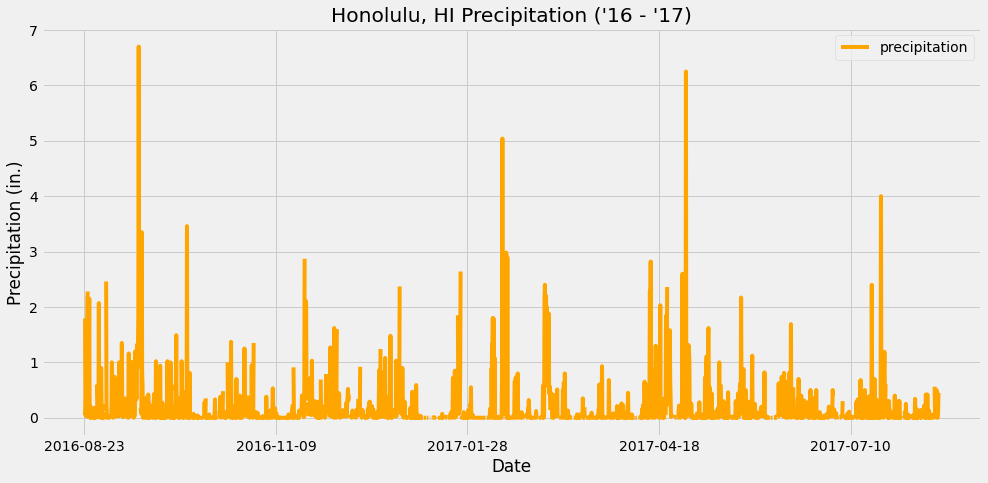

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15, 7))
precipitation.plot(ax = ax, x_compat = True, color = 'orange')

# format plot
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Honolulu, HI Precipitation ('16 - '17)")

# save plot
plt.savefig("Images/precipitation.png")

# display plot
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Station.id).distinct().count()
station

9

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()

for result in active_stations:
    print(f"{result[0]}\tCount: {result[1]}")

USC00519281	Count: 2772
USC00519397	Count: 2724
USC00513117	Count: 2709
USC00519523	Count: 2669
USC00516128	Count: 2612
USC00514830	Count: 2202
USC00511918	Count: 1979
USC00517948	Count: 1372
USC00518838	Count: 511


In [43]:

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()

for result in station:
    print(f"{result[0]}\tCount: {result[1]}")

USC00519281	Count: 2772
USC00519397	Count: 2724
USC00513117	Count: 2709
USC00519523	Count: 2669
USC00516128	Count: 2612
USC00514830	Count: 2202
USC00511918	Count: 1979
USC00517948	Count: 1372
USC00518838	Count: 511


In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
numone = 'USC00519281'
hightemps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == numone).all()
print(f"The lowest temperature is: {hightemps[0][0]} Fahrenheit, the highest temperature is: {hightemps[0][1]} Fahrenheit, The average temperature is: {round(hightemps[0][2], 2)} Fahrenheit  ")

The lowest temperature is: 54.0 Fahrenheit, the highest temperature is: 85.0 Fahrenheit, The average temperature is: 71.66 Fahrenheit  


In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == numone).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

# Save as a data frame
observation_df = pd.DataFrame(year_temps, columns = ['date', 'temperature'])

# Set index by date
observation_df.set_index('date', inplace = True)

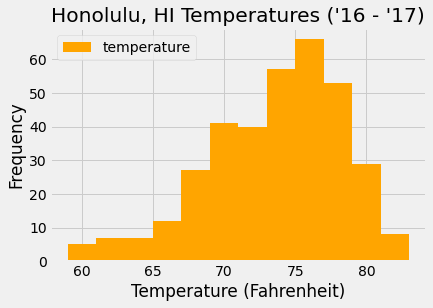

In [47]:
#Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
year_temps_df.plot.hist(bins = 12, ax = ax, color = "orange")

#set labels
ax.set_xlabel('Temperature (Fahrenheit)')
ax.set_ylabel('Frequency')
ax.set_title("Honolulu, HI Temperatures ('16 - '17)")

#save figure
plt.savefig("Images/temperature_history.png")

#plot

plt.show()

## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [50]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2017-02-06', '2017-02-16')

print(f"Lowest Temperature: {trip_temps[0][0]} Fahrenheit, Average Temperature: {round(trip_temps[0][1], 2)} Fahrenheit, Highest Temperature: {trip_temps[0][2]} Fahrenheit")

Lowest Temperature: 59.0 Fahrenheit, Average Temperature: 70.42 Fahrenheit, Highest Temperature: 80.0 Fahrenheit


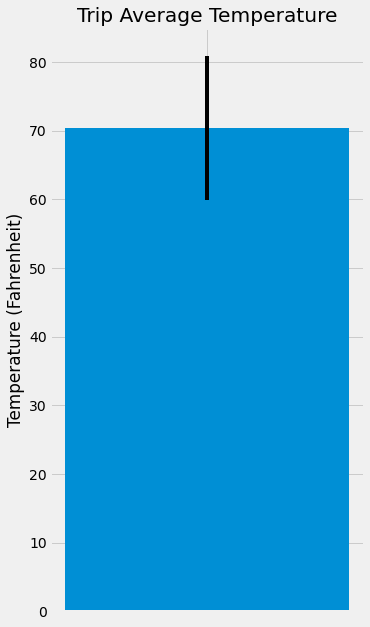

In [53]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
highest = trip[0][2] - trip[0][0]
average = trip[0][1]

# plot chart
fig, ax = plt.subplots(figsize = (5, 10))

ax.bar(1, average, yerr = highest/2, width = 0.5)

#set labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_title('Trip Average Temperature')
ax.set_ylabel('Temperature (Fahrenheit)')

#save fig
plt.savefig("Images/trip_avg_temp")

#show figure

plt.show()

In [54]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sta_yearly_prec= session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                               Station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
syc_df = pd.DataFrame(sta_yearly_prec, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
        'Elevation', 'Avg. Precipitation (in.)'])

syc_df


,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.450640
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.198949
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.141429
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.125434
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.121051
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.076500
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.044819


In [62]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [64]:
# Set dates in order to make code work 
trip_dates = ["01-04", "01-05", "01-06", "01-07", "01-08", "01-09", "01-10", "01-11", "01-12", "01-13", "01-14",
             "01-15", "01-16", "01-17", "01-18"]

daily_norms = []

for trip_date in trip_dates:
    day = {}
    day['Date'] = f"2019-{trip_date}"
    daily_norm = daily_normals(trip_date)
    day['Min'] = daily_norm[0][0]
    day['Avg'] = daily_norm[0][1]
    day['Max'] = daily_norm[0][2]
    daily_norms.append(day)


#load into a data frame
daily_norms_df = pd.DataFrame(daily_norms)

#set index
daily_norms_df.set_index('Date', inplace = True)

#display
daily_norms_df

,Min,Avg,Max
Date,,,
2019-01-04,58.0,70.000000,76.0
2019-01-05,56.0,67.964286,76.0
2019-01-06,61.0,68.964912,76.0
2019-01-07,57.0,68.543860,76.0
2019-01-08,57.0,67.160714,75.0
2019-01-09,58.0,67.929825,78.0
2019-01-10,62.0,69.741379,77.0
2019-01-11,57.0,67.310345,78.0
2019-01-12,57.0,67.407407,81.0


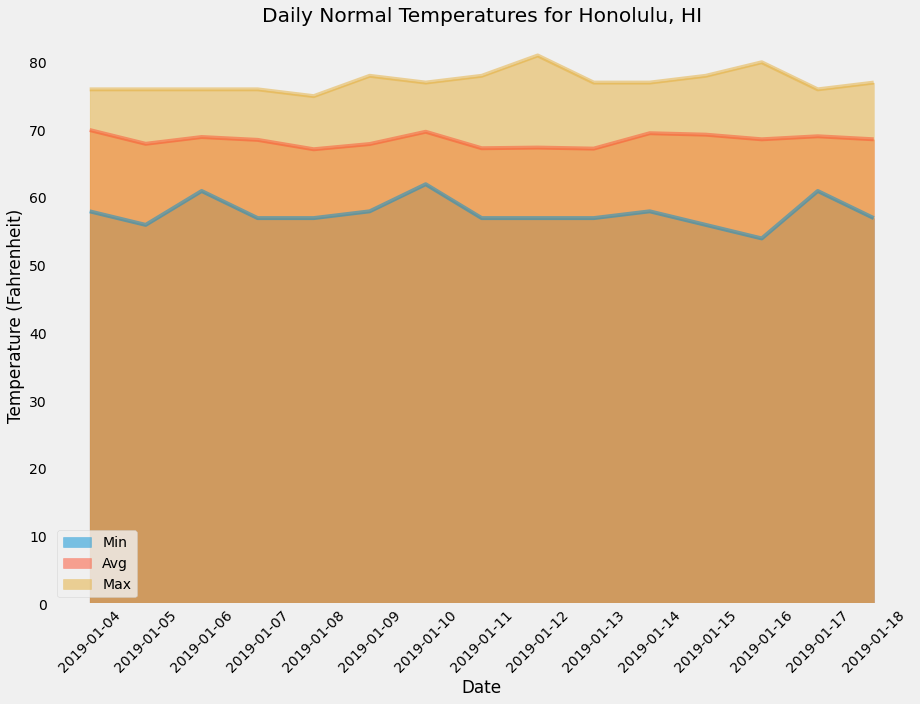

In [66]:
# Plot the daily normals as an area plot with `stacked=False`

#plot
fig, ax = plt.subplots(figsize = (13, 10))
daily_norms_df.plot.area(ax = ax, stacked = False)

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Fahrenheit)')
ax.set_title('Daily Normal Temperatures for Honolulu, HI')

#set ticks
dates = [f"2019-{trip_date}" for trip_date in trip_dates]
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates, rotation = 45)

#save figure
plt.savefig('Images/dailynormarea.png')

#show
plt.grid()
plt.tight_layout()
plt.show()